In [34]:
plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 11,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 15,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 15,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 18,
                  'ytick.labelsize': 18,
                 }

In [2]:
palette = ['#a6611a', '#dfc27d']

# Libraries

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import os
import sklearn.preprocessing as pp
import sklearn.decomposition as skdecomp

# Paths & data

In [4]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [5]:
uv_upturn = pd.read_csv(os.path.join(psm_path, 'uvupturn_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                          'mass_stellar_best_fit'], axis=1)
uv_weak   = pd.read_csv(os.path.join(psm_path, 'uvweak_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                        'mass_stellar_best_fit'], axis=1)

In [6]:
uv_upturn.keys()

Index(['ager_percentile50', 'metalicity_Z_Zo_percentile50',
       'sSFR_0_1Gyr_percentile50', 'tform_percentile50', 'tlastb_percentile50',
       'fb29_percentile50', 'FUV-NUV', 'FUV-R', 'NUV-R'],
      dtype='object')

### Standardizing the samples

In [7]:
uv_upturn_std = pp.StandardScaler().fit_transform(uv_upturn)
uv_weak_std   = pp.StandardScaler().fit_transform(uv_weak)

#### sanity check

In [8]:
uv_upturn.values[:,0]

array([9.677, 9.772, 9.747, 8.992, 9.692, 9.697, 9.717, 9.627, 9.407,
       9.567, 9.752, 9.712, 9.797, 9.642, 9.567, 9.677, 9.607, 9.502,
       9.457, 9.752, 9.792, 9.682, 9.792, 9.592, 9.812, 9.562, 9.672,
       9.602, 9.762, 9.732, 9.537, 9.627, 9.747, 9.772, 9.707, 9.702,
       9.682, 9.802, 9.822, 9.502, 9.722, 9.572, 9.802, 9.627, 9.727,
       9.642, 9.557, 9.782, 9.662, 9.507, 9.557, 9.677, 9.682, 9.622,
       9.377, 9.692, 9.552, 9.547, 9.812, 9.812, 9.727, 9.602, 9.672,
       9.677, 9.767, 9.762, 9.372, 9.752, 9.727, 9.552, 9.702, 9.707,
       9.797, 9.767, 9.637, 9.802, 9.767, 9.757, 9.642, 9.652, 9.587,
       9.727, 9.792, 9.697, 9.632, 9.627, 9.712])

In [9]:
for i in range(uv_upturn.values[:,1].size):
    stded = (uv_upturn.values[i,1] - np.mean(uv_upturn.values[:,1]))/np.std(uv_upturn.values[:,1])
    print(stded)

0.2043562752163742
-1.3830540769108128
-0.5011594368401535
-1.6652603617334238
0.7687688448615959
0.09852891840789499
-1.2772267201023337
-1.3477782913079865
0.27490784642202704
1.615387699329429
0.41601098883333265
-0.6775383648542852
1.6859392705350817
-0.5364352224429799
-0.2895047232231955
-1.3477782913079865
1.7564908417407346
1.3331814145068184
2.5325581250029146
-1.206675148896681
-0.8891930784712436
-0.11312579520906345
-0.8186415072655908
0.6629414880531167
-0.6775383648542852
-0.2542289376203691
2.638385481811394
-0.2895047232231955
2.4972823394000883
-0.748089936059938
-0.5364352224429799
0.48656256003898546
0.5218383456418119
-0.04257422400341064
0.6276657024502903
-0.9597446496768964
-0.07785000960623704
2.4972823394000883
-0.2895047232231955
0.6982172736559431
0.027977347202242174
-0.4658836512373271
0.41601098883333265
-0.6775383648542852
0.1338047040107214
-0.3953320800316743
0.27490784642202704
-0.11312579520906345
-0.5011594368401535
-1.6299845761305973
0.274907846422

In [10]:
uv_upturn_std[:,1]

array([ 0.20435628, -1.38305408, -0.50115944, -1.66526036,  0.76876884,
        0.09852892, -1.27722672, -1.34777829,  0.27490785,  1.6153877 ,
        0.41601099, -0.67753836,  1.68593927, -0.53643522, -0.28950472,
       -1.34777829,  1.75649084,  1.33318141,  2.53255813, -1.20667515,
       -0.88919308, -0.1131258 , -0.81864151,  0.66294149, -0.67753836,
       -0.25422894,  2.63838548, -0.28950472,  2.49728234, -0.74808994,
       -0.53643522,  0.48656256,  0.52183835, -0.04257422,  0.6276657 ,
       -0.95974465, -0.07785001,  2.49728234, -0.28950472,  0.69821727,
        0.02797735, -0.46588365,  0.41601099, -0.67753836,  0.1338047 ,
       -0.39533208,  0.27490785, -0.1131258 , -0.50115944, -1.62998458,
        0.27490785,  0.66294149, -0.53643522,  0.31018363, -0.60698679,
       -0.04257422,  0.20435628, -0.78336572,  0.45128677, -0.18367737,
        0.34545942,  0.6276657 ,  0.23963206, -0.32478051, -1.17139936,
        2.42673077,  1.15680249, -1.45360565,  0.76876884, -1.31

## PCA projections

In [11]:
nc = 5

In [12]:
pca = skdecomp.PCA(n_components=nc)

In [13]:
pca_uvup = pca.fit_transform(uv_upturn_std)
uvup_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvup_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                               index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

[0.45466132 0.17035596 0.15544743 0.11069186 0.05947179]
0.9506283602799395


In [14]:
pca_uvwk = pca.fit_transform(uv_weak_std)
uvwk_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvwk_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                            index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

[0.39542108 0.25234407 0.13153108 0.10569213 0.07484832]
0.9598366899419006


In [15]:
uvwk_results

,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
PC1,-0.503041,0.175110,0.331447,-0.411972,-0.419775,0.394505,0.030597,-0.080359,-0.312200
PC2,-0.103688,-0.126456,-0.234097,0.148901,-0.184475,0.300230,0.600617,0.615939,0.178870
PC3,0.128586,-0.034382,0.590998,-0.475069,0.385456,-0.279306,0.283061,0.298378,0.107580
PC4,-0.070781,0.913564,-0.070368,0.036859,0.163812,0.064171,-0.030514,0.089389,0.337945
PC5,-0.173741,-0.288828,0.139429,-0.122043,-0.179705,0.143168,-0.345508,-0.032016,0.823933


In [16]:
pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2'])
# pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2'])

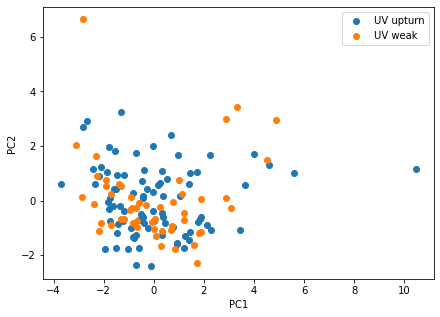

In [17]:
plt.subplots(figsize=(7,5))
plt.plot(pca_uvup_df['PC1'], pca_uvup_df['PC2'], 'o', label='UV upturn')
plt.plot(pca_uvwk_df['PC1'], pca_uvwk_df['PC2'], 'o', label='UV weak')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best')

plt.show()

In [18]:
pca.explained_variance_

array([3.62996554, 2.31651853, 1.20745534, 0.9702538 , 0.68710761])

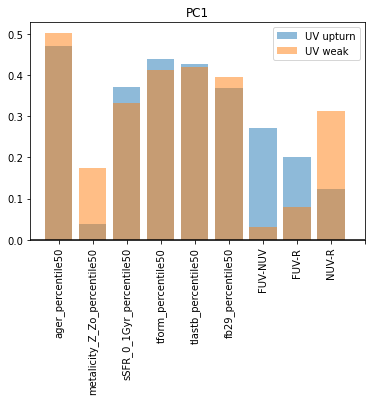

In [19]:
plt.title("PC1")
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()

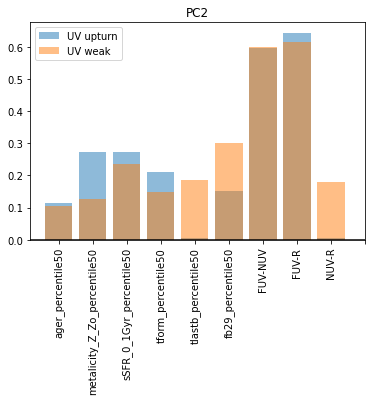

In [20]:
plt.title("PC2")
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()

In [21]:
list(uvup_results.keys())

['ager_percentile50',
 'metalicity_Z_Zo_percentile50',
 'sSFR_0_1Gyr_percentile50',
 'tform_percentile50',
 'tlastb_percentile50',
 'fb29_percentile50',
 'FUV-NUV',
 'FUV-R',
 'NUV-R']

In [22]:
xticks = [
#     r"$\log M_{\star}$", 
          r"$\left< \logt \right>_{r}$", 
          r"$\left< Z/Z_{\odot} \right>$", 
          r"$\left< \rm{sSFR} \right>$", 
          r"$\left< t_{\rm{form}} \right>$", 
          r"$\left< t_{\rm{last}} \right>$", 
          r"$\left< f_{\rm{burst}}^{2\rm{Gyr}} \right>$", 
          r"FUV-NUV", r"FUV-$r$", r"NUV-$r$"]

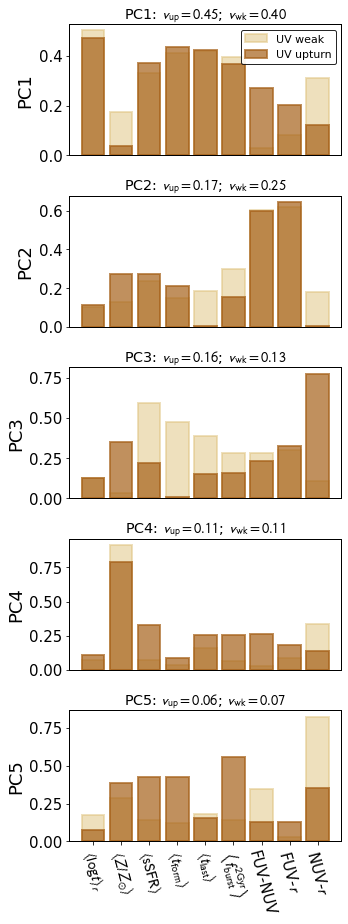

In [36]:
plt.rcParams.update(plotpars_3cols)
plt.subplots(figsize=(5,13))

p1 = plt.subplot(5, 1, 1)
plt.title(r"PC1: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[0], uvwk_var[0]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.5, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.7, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p1.xaxis.set_visible(False)
plt.legend(loc='best')
plt.ylabel("PC1")
# plt.legend(loc='best')

p2 = plt.subplot(5, 1, 2)
plt.title(r"PC2: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[1], uvwk_var[1]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.5, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.7, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p2.xaxis.set_visible(False)
plt.ylabel("PC2")

p3 = plt.subplot(5, 1, 3)
plt.title(r"PC3: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[2], uvwk_var[2]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[2,:]), label='UV weak', alpha=0.5, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[2,:]), label='UV upturn', alpha=0.7, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p3.xaxis.set_visible(False)
# plt.legend(loc='best')
plt.ylabel("PC3")

p4 = plt.subplot(5, 1, 4)
plt.title(r"PC4: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[3], uvwk_var[3]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[3,:]), label='UV weak', alpha=0.5, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[3,:]), label='UV upturn', alpha=0.7, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p4.xaxis.set_visible(False)
# plt.legend(loc='best')
# plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
plt.ylabel("PC4")

plt.subplot(5, 1, 5)
plt.title(r"PC5: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[4], uvwk_var[4]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[4,:]), label='UV weak', alpha=0.5, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[4,:]), label='UV upturn', alpha=0.7, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
# plt.legend(loc='best')
plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
plt.ylabel("PC5")

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'pca_results.pdf'))
plt.savefig(os.path.join(psm_path, 'pca_results.png'))
plt.show()

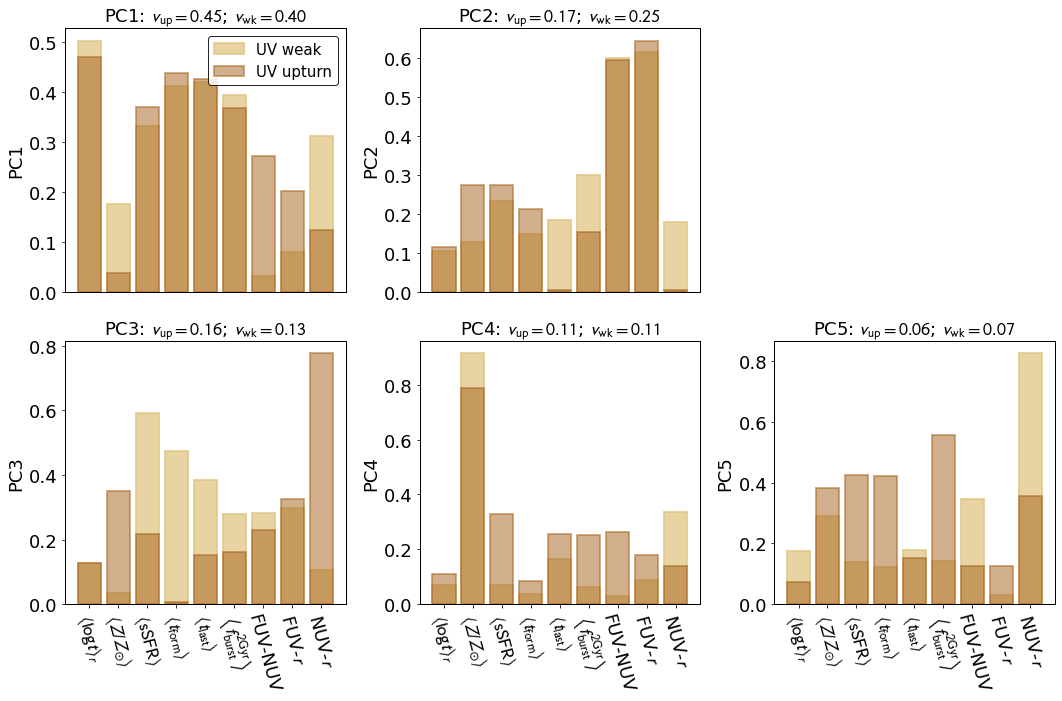

In [35]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,10))

p1 = plt.subplot(2, 3, 1)
plt.title(r"PC1: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[0], uvwk_var[0]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.7, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.5, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p1.xaxis.set_visible(False)
plt.legend(loc='best')
plt.ylabel("PC1")
# plt.legend(loc='best')

p2 = plt.subplot(2, 3, 2)
plt.title(r"PC2: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[1], uvwk_var[1]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.7, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.5, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p2.xaxis.set_visible(False)
plt.ylabel("PC2")

p3 = plt.subplot(2, 3, 4)
plt.title(r"PC3: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[2], uvwk_var[2]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[2,:]), label='UV weak', alpha=0.7, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[2,:]), label='UV upturn', alpha=0.5, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
# p3.xaxis.set_visible(False)
plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
# plt.legend(loc='best')
plt.ylabel("PC3")

p4 = plt.subplot(2, 3, 5)
plt.title(r"PC4: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[3], uvwk_var[3]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[3,:]), label='UV weak', alpha=0.7, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[3,:]), label='UV upturn', alpha=0.5, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
# p4.xaxis.set_visible(False)
# plt.legend(loc='best')
# plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
plt.ylabel("PC4")

plt.subplot(2, 3, 6)
plt.title(r"PC5: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[4], uvwk_var[4]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[4,:]), label='UV weak', alpha=0.7, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[4,:]), label='UV upturn', alpha=0.5, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
# plt.legend(loc='best')
plt.xticks(np.arange(0,9,1), xticks, rotation=-75)
plt.ylabel("PC5")

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'pca_results_thesis.pdf'))
plt.savefig(os.path.join(psm_path, 'pca_results_thesis.png'))
plt.show()

## Testing kernel PCA

In [25]:
knc = 6

In [26]:
# kpca = skdecomp.KernelPCA??

In [27]:
kpca = skdecomp.KernelPCA(n_components=knc, kernel='rbf', gamma=10)

In [28]:
kpca_uvup = kpca.fit_transform(uv_upturn_std)
# print(kpca.)
# print(np.sum(pca.explained_variance_ratio_))
# uvup_results = pd.DataFrame(kpca., columns=uv_upturn.columns, 
#                                index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [29]:
kpca_uvwk = kpca.fit_transform(uv_weak_std)

In [30]:
kpca_uvup.shape

(87, 6)

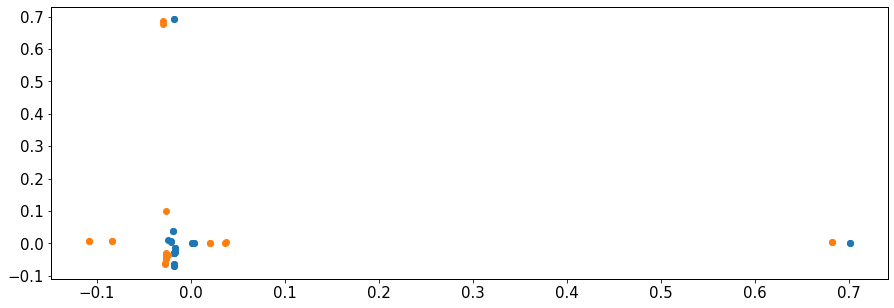

In [31]:
plt.plot(kpca_uvup[:,2], kpca_uvup[:,5], 'o')
plt.plot(kpca_uvwk[:,2], kpca_uvwk[:,5], 'o')
plt.show()